# Handwritten digit classification using K-Nearest Neighbors and Naive Bayes

### Author: Zac Carrico

Digitizing handwriting is important for many industries, perhaps most notably post-offices, which have to sort millions of parcels a year. Teaching computers to read handwriting has been very successful in large part due to the improvement of certain machine learning techniques such as artificial neural networks (ANN); hidden Markov models (HMM); and support vector machines (SVM).

This project explores two simple machine learning methods for for classifying handwritten digits.The first is K-nearest neighbors and second is Naive Bayes, and both do surprisingly well at handwritten digit classification. The purpose of this project is to explore these algorithms as applied to handwritten digit classification

## Naive Bayes classifier example

Suppose we have an image of a handwritten digit and we want to assign a probability that the digit is a 5 by comparing it to a database of handwritten digit images. We will assume that it's a binary image such that pixels are either white (0) or black (1). If the pixels are black they contain part of the digits pen stroke. The Naive Bayes probability that this digit is a 5 could be calculated from three components: the likelihood, prior probability, and normalization constant. The **likelihood** is the probability of whether or not each pixel will be dark. The **prior** is the frequency of 5 occurences in our set of images. The **normalization constant** is simply the probability of observing all the pixels in their current dark/light state. What makes it Naive is that each pixel is compared across images ignoring all of its neighboring pixels. The naive assumption is that its neighbors are independent, which is of course untrue, but greatly reduces the complexity of these calculations. To calculate the probability that image is a 5 we multiply the likelihood by the prior and divide by the normalization constant. 
$$ probability = \frac{likelihood * prior}{normalization constant} $$
$$ P(5|X_1, ..., X_n) = \frac{P(X_1, ..., X_n|5)P(5)}{P(X_1, ..., X_n)} $$

More generally this would be  
$$ P(Y|X_1, ..., X_n) = \frac{P(X_1, ..., X_n|Y)P(Y)}{P(X_1, ..., X_n)} $$

In these cases X_1, ..., X_n are the pixel locations when an nxn image is transformed to an n\*n x 1 array.

## K-Nearest Neighbors classifier example
K-Nearest Neighbors is even simpler than Naive Bayes, but works just as well for this task. For the most basic case, k = 1 K-nearest neighbors will look at your database of images and identify the image which is most similar to your image of interest. It then labels your image the same digit as its closest image in the database. As another example, if k = 5 you look at the 5 images in your database closest to your image and choose whichever has the digit is most frequent of these 5. For example, if of the 5 nearest neighbors there are two 3s and two 8s, you choose 3 for you image of interest.

In [36]:
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# plot images inline
%matplotlib inline

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

The data is from the MNIST handwritten digit database.

In [4]:
# Loading the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


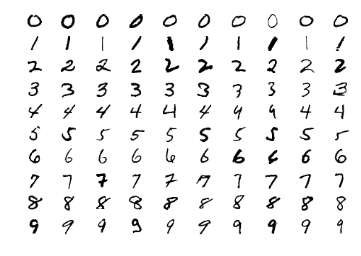

In [5]:
def visualize_data(num_examples, data_labels, data):

    indexes = list()
    for i in range(10):
        indexes.extend(np.where(data_labels == i)[0][0:num_examples])
    fig, axs = plt.subplots(nrows = 10, ncols = num_examples) # create figure and assign subplot objects to axs
    axs = axs.ravel() # returns a contiguous flattened array
    for i in range(len(indexes)):
        axs[i].imshow(data[indexes[i]].reshape(28,28), cmap='Greys')
        axs[i].axis('off')
    plt.show()

visualize_data(10, data_labels = train_labels, data = train_data)

## K-Nearest Neighbors Classification of handwritten digits
Let's start by looking at a K-Nearest Neighbors model for clasifying the handwritten digits. We will be training using only part of the training set, and evaluation on the development set.

In [15]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(mini_train_data, mini_train_labels)
    accuracy = accuracy_score(y_true = dev_labels, y_pred = neigh.predict(dev_data)) # dev is for development
    print('k = ', k, '; accuracy = ', accuracy, sep = '')

k = 1; accuracy = 0.888
k = 3; accuracy = 0.878
k = 5; accuracy = 0.869
k = 7; accuracy = 0.865
k = 9; accuracy = 0.863


Using one nearest neighbor shows the highest accuracy, and the accuracy decreases as the number of nearest neighbors increases. Let's look at the precision, recall, f1-score, and the number of assignments made to each category (called "support" in the table).

In [16]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(mini_train_data, mini_train_labels)
print(classification_report(y_true = dev_labels, 
                                    y_pred = neigh.predict(dev_data)))

             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



The accuracies are surprisingly good considering the simplicity of the algorithm. Based on the F1 score, digit 9 is the most difficult digit to predict accurately for most of the k-nearest neighbor fits.

Let's explore the effect of training set size on accuracy and the the amount of time needed to train.

In [7]:
def variable_train_sizes_knn(train_sizes, accuracies):
    accuracies = list()
    times = list()
    for train_size in train_sizes:
        neigh = KNeighborsClassifier(n_neighbors = 1)
        neigh.fit(train_data[0:train_size], train_labels[0:train_size])
        time_start = time.time()
        y_pred = neigh.predict(dev_data)
        time_fin = time.time()
        time_s = (time_fin-time_start)
        accuracy = accuracy_score(y_true = dev_labels, y_pred = y_pred)
        # print("training size %s has an accuracy of %0.2f and took %0.3f s to complete" % (train_size, accuracy, time_s))
        accuracies.append(accuracy)
        times.append(time_s)
    return(accuracies, times)

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
accuracies, times = variable_train_sizes_knn(train_sizes, accuracies)

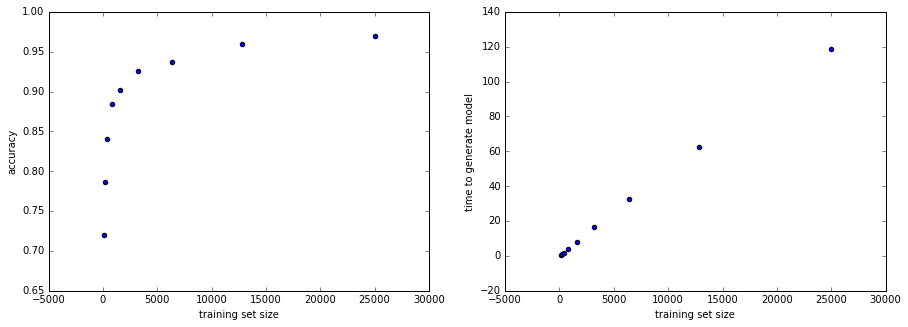

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
axs[0].scatter(x = train_sizes, y = accuracies)
axs[0].set_xlabel('training set size')
axs[0].set_ylabel('accuracy')

axs[1].scatter(x = train_sizes, y = times)
axs[1].set_xlabel('training set size')
axs[1].set_ylabel('time to generate model')
plt.show()

These result show that the time to generate the model is essentially linear with respect to training set size, but the return on improved accuracy is minimal after 10,000 training observations. By a training set size of 12,800 we've already reached an accuracy of 95% on development data.

Out of curiosity, lets look at the nearest neighbors for these first observation in our training set.

The true label is 9.0 and the 9 nearest neighbors are:


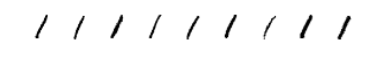

In [21]:
neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(mini_train_data, mini_train_labels)
fig, axs = plt.subplots(ncols = 9) # create figure and assign subplot objects to axs
axs = axs.ravel() # returns a contiguous flattened array
print("The true label is", mini_train_labels[0], "and the 9 nearest neighbors are:")
for i, j in enumerate(neigh.kneighbors([mini_train_data[0]])[1][0]):
    axs[i].imshow(mini_train_data[j].reshape(28,28), cmap='Greys')
    axs[i].axis('off') 

The first observation in our training set contained a 1 and the figure shows it's nearest neighbors. They're all very similar. By comparing these 1s to the variety of 1s in the original training data printout we can see with our eyes that K-nearest neighbors is doing a good job.

Now let's look at the confusion matrix to better understand where the misclassifications are made.

In [11]:
neigh = KNeighborsClassifier(n_neighbors = 1) # chose 1 because this performed the best
neigh.fit(mini_train_data, mini_train_labels) # fitting the model
pred = neigh.predict(dev_data) # predicting

print(confusion_matrix(y_true = dev_labels, y_pred = pred))

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


The confusion matrix shows the true class values at the row position (eg row 0 is digit 0, row 1, is digit 1, etc.) and the predicted class as columns (eg col 0 is predicited to be digit 0, col1 is predicted to be digit 1, etc.). From the confusion matrix we can see that 14 of the 4 digits were misclassified as 9. Let's visualize this misclassified 4s to see if they indeed look like 9s.

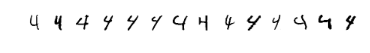

In [24]:
confused_pairs = np.where((pred != dev_labels)) # these are the predicted array's indexes at which the number predicted was wrong

# confused_pred are the predicted values confused digits (ie those it got wrong)
confused_pred = pred[confused_pairs] 

# now the indexes from the confused_pred are collected
nine_but_shoulda_been_four_confused_pred_indexes = np.intersect1d(np.where(pred[confused_pairs] == 9), 
                                                          np.where(dev_labels[confused_pairs] == 4))

# to get the data for these specific predictions I need to repeat the steps on the dev_data
dev_confused_data = dev_data[confused_pairs]

# nine_but_shoulda_been_four_data are the predictived 9 values, which are in truth 4s
nine_but_shoulda_been_four_data = dev_confused_data[nine_but_shoulda_been_four_confused_pred_indexes]

# plotting first 5 examples
fig, axs = plt.subplots(nrows = 1, ncols = 14)
axs = axs.ravel()
for i in range(14):
    axs[i].imshow(nine_but_shoulda_been_four_data[i].reshape(28,28), cmap = 'Greys')
    axs[i].axis('off')

None of these look like 9s to me so there is clearly room for improvement in this classification approach.

Sometimes blurring an image helps with machine learning approaches. In a way, it makes the data more general, which is good for not overfitting. Let's try blurring the images in either the training or development data to see the effect on accuracy. In this case the blurring will be done by assigning a given pixel the value of the average of its eight neighboring pixels.

In [13]:
def blur(data):
    blurred_data = np.empty((0,784), float)
    data_copy = np.copy(data) # this is to prevent accidental overwriting of the data
    count = 0
    for m in data_copy:        
        m = m.reshape(28,28) # this will give me the original values, as opposed to n, which is the blurred images that will be created
        n = np.empty((28,28), float)
        for i in range(28):
            for j in range(28):
                im1 = (i - 1) if (i - 1) >= 0 else None # im1 for i minus 1
                jm1 = (j - 1) if (j - 1) >= 0 else None
                ip1 = (i + 1) if (i + 1) < 28 else None
                jp1 = (j + 1) if (j + 1) < 28 else None
                k00 = m[im1, jm1] if im1 is not None and jm1 is not None else None # k 00 because it's the [0,0] of the gaussian kernel
                k01 = m[im1, j] if im1 is not None else None
                k02 = m[im1, jp1] if im1 is not None and jp1 is not None else None
                k10 = m[i, jm1] if jm1 is not None else None
                k11 = m[i, j]
                k12 = m[i, jp1] if jp1 is not None else None
                k20 = m[ip1, jm1] if ip1 is not None and jm1 is not None else None
                k21 = m[ip1, j] if ip1 is not None else None
                k22 = m[ip1, jp1] if ip1 is not None and jp1 is not None else None
                k_list = [k00, k01, k02,
                          k10, k11, k12,
                          k20, k21, k22]
                k_list = [x for x in k_list if x is not None]
                n[i,j] = sum(k_list)/len(k_list)
        blurred_data = np.append(blurred_data, n.flatten().reshape(1,784), axis = 0)
    return(blurred_data)

def knn_accuracy(train_data, train_labels, dev_data, dev_labels):
    '''returns accuracy for knn with n_neighbors of 1 using the train and dev argument inputs'''
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(train_data, train_labels)
    y_pred = neigh.predict(dev_data)
    accuracy = accuracy_score(y_true = dev_labels, y_pred = y_pred)
    return(accuracy)

print("For k = 1, using non-blurred train and non-blurred dev data, the accuracy is", 
      knn_accuracy(train_data = mini_train_data,
                   train_labels = mini_train_labels,
                   dev_data = dev_data,
                   dev_labels = dev_labels))

print("For k = 1, using blurred train and non-blurred dev data, the accuracy is", 
  knn_accuracy(train_data = blur(mini_train_data),
               train_labels = mini_train_labels,
               dev_data = dev_data,
               dev_labels = dev_labels))

print("For k = 1, using non-blurred train and blurred dev data, the accuracy is", 
  knn_accuracy(train_data = mini_train_data,
               train_labels = mini_train_labels,
               dev_data = blur(dev_data),
               dev_labels = dev_labels))

print("For k = 1, using blurred train and blurred dev data, the accuracy is", 
  knn_accuracy(train_data = blur(mini_train_data),
               train_labels = mini_train_labels,
               dev_data = blur(dev_data),
               dev_labels = dev_labels))

For k = 1, using non-blurred train and non-blurred dev data, the accuracy is 0.888
For k = 1, using blurred train and non-blurred dev data, the accuracy is 0.908
For k = 1, using non-blurred train and blurred dev data, the accuracy is 0.871
For k = 1, using blurred train and blurred dev data, the accuracy is 0.902


The results show that using blurred training and non-blurred developement data do the best. It also indicates that blurring the dev data
These conditions were only done for the mini_train data, so a larger difference in accuracies might be observed if the full training set were used. Using a more sophisticated blurring algorithm might also help.

This gave us an idea of how K-nearest neighbors will perform. Let's compare it to Naive Bayes.

## Naive Bayes for handwritten digit classification

To start off with the pixel values will be made binary to reduce complexity and enable use of a Bernoulli Naive Bayes algorithm.

In [27]:
bin_train_data = np.copy(mini_train_data)
bin_train_data = np.where(mini_train_data > 0, 1, 0)

bin_dev_data = np.copy(dev_data)
bin_dev_data = np.where(dev_data > 0, 1, 0)

bnb = BernoulliNB()
bnb.fit(bin_train_data, mini_train_labels)
print("The accuracy of the binary naive Bayes is ",
      accuracy_score(y_true = dev_labels, y_pred = bnb.predict(bin_dev_data)))

The accuracy of the binary naive Bayes is  0.815


This is pretty good for a first try. Let's see what happens if we incorporate a gray value pixel -- going from binary to tertiary. To do this, black pixels are assigned a value of 0, white values 2, and those in between (ie gray pixels) are assigned a value of 1.

In [28]:
# multinomial naive bayes
# assigning 2 to black, 0 to white, and 1 to anything in between; 
# there are multiple ways to bin the pixels and this seemed a logical first attempt
multinomial_train_data = np.copy(mini_train_data)
multinomial_train_data[multinomial_train_data == 0] = 0
multinomial_train_data[multinomial_train_data == 1] = 2
multinomial_train_data[(multinomial_train_data != 2) & (multinomial_train_data != 0)] = 1

multinomial_dev_data = np.copy(dev_data)
multinomial_dev_data[multinomial_dev_data == 0] = 0
multinomial_dev_data[multinomial_dev_data == 1] = 2
multinomial_dev_data[(multinomial_dev_data != 2) & (multinomial_dev_data != 0)] = 1

mnb = MultinomialNB()
mnb.fit(multinomial_train_data, mini_train_labels)
print("The accuracy of the multnomial naive Bayes is ", 
      accuracy_score(y_true = dev_labels, y_pred = mnb.predict(multinomial_dev_data)))

The accuracy of the multnomial naive Bayes is  0.791


The decrease in accuracy for the multinomial naive bayes relative to binary naive bayes is due to increasing the number of possible outcomes from two (binomial) to three (multinomial). This is problematic because now there is a probability for three types of pixels and it is less likely that a digits image will closely match the three types of pixels relative to the two types of pixels.  
Lets see if we can increase the accuracy of hte binomial NB further by finding an optimal smoothing value. To do this GridSearchCV is used to perform a search over values of alpha (the Laplace smoothing parameter) for the Bernoulli NB model. 

In [29]:
bin_mini_train_data = np.copy(mini_train_data)
bin_mini_train_data = np.where(bin_mini_train_data > 0, 1, 0)

bin_dev_data = np.copy(dev_data)
bin_dev_data = np.where(bin_dev_data > 0, 1, 0)

alphas = {'alpha': [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
clf = GridSearchCV(BernoulliNB(), alphas)
clf.fit(bin_mini_train_data, mini_train_labels)
print("The best estimator across alpha values of 0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0 is %s" % clf.best_estimator_)

The best estimator across alpha values of 0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0 is BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)


Let's use the alpha value 0.0001 since it beformed the best and compare it to if the alpha value was zero.

In [30]:
clf_best = BernoulliNB(alpha = 0.0001)
clf_best.fit(bin_mini_train_data, mini_train_labels)
print("For the best estimator, the accuracy is ", accuracy_score(y_true = dev_labels, y_pred = clf.predict(bin_dev_data)))

clf_alpha0 = BernoulliNB(alpha = 0)
clf_alpha0.fit(bin_mini_train_data, mini_train_labels)
print("For alpha = 0, the accuracy is ", accuracy_score(y_true = dev_labels, y_pred = clf_alpha0.predict(bin_dev_data)))

For the best estimator, the accuracy is  0.816
For alpha = 0, the accuracy is  0.099


The best alpha is 0.0001, which is far better than an alpha of 0 with respect to accuracy. This makes sense because without smoothing the model is assuming a zero probability for specific pixel values for given digits (P(X_i = x|Y = digit)), but this assumption is too strong for this type of data because there's always the chance that pixels never used before for a specific digit will be used in the future.

### Gaussian Naive Bayes
What would happen if we use Gaussian Naive Bayes classifier? Lets find out.

In [31]:
clf = GaussianNB()
clf.fit(train_data, train_labels)
print("The accuracy of GaussianNB is", 
      accuracy_score(y_true = dev_labels, y_pred = clf.predict(dev_data)))

The accuracy of GaussianNB is 0.571


This Gaussian Naive Bayes classification accuracy is very low, presumably because the use of many different pixel values in its model. It is hard to describe, but because many different pixel values are used, the probability of a new digit's image matching this pixel value signature is much less than if it were binary. This appears to decrease the accuracy of model, and will also further violate the assumption of independency of pixel intensities

One thing that might help is to reduce the variation of the gaussian model. This can be done by using a very small sigma value.

In [32]:
clf.sigma_ = clf.sigma_/100000 # the 100,000 came from toying with different values until finding the highest accuracy
print("The accuracy of GaussainNB after dividing its sigma by 100,000 (arrived at empirically) is", 
      accuracy_score(y_true = dev_labels, y_pred = clf.predict(dev_data)))

The accuracy of GaussainNB after dividing its sigma by 100,000 (arrived at empirically) is 0.825


Reducing the sigma value reduces the distribution width of the gaussian, making it more binary-like.

The nice thing about the Naive Bayes model is it's generative so we can generate digit images with it. Let's generate some and see what they look like.

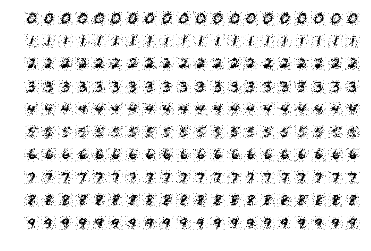

In [33]:
bin_mini_train_data = np.copy(mini_train_data)
bin_mini_train_data = np.where(mini_train_data > 0, 1, 0)

bnb = BernoulliNB()
bnb.fit(bin_mini_train_data, mini_train_labels)

num_examples = 20
fig, axs = plt.subplots(nrows = 10, ncols = num_examples) # create figure and assign subplot objects to axs
axs = axs.ravel() # returns a contiguous flattened array

axs_i = 0

while axs_i < num_examples*10:
    for i in range(10):
        for j in range(num_examples):
            rand_arr = np.random.rand(784,)
            new_dig = np.exp(bnb.feature_log_prob_[i]*rand_arr)
            new_dig = np.where(new_dig > 0.8, 1, 0)
            axs[axs_i].imshow(new_dig.reshape(28,28), cmap = 'Greys')
            axs[axs_i].axis('off')
            axs_i += 1

The generated digits are more homogeneous than the human generated digits and they're much noisier (ie dark pixels far from the digits' stroke's centers) due to the assumption of independency between pixels. The noise could be reduced by reducing the random value multiplied by the probability of the pixel the further that pixel is from high probability pixel clusters. The worst looking digit is 5 because it had lower densities of high probability pixels.

## Summary
Handwritten digit classification was done with K-nearest neighbors or Naive Bayes, both of which had surprisingly high accuracies when tested on the development data.
### Key findings for K-nearest neighbors classification:
- accuracy decreases with increasing numbers of neighbors
- accuracy of prediction increases with training set size, but after 3000 training observations (~94% accuracy), the rate of increase is much slower
- 9 is the most common misclassification, and miscalled are the source of most of the problem, but visual inspection shows them to clearly be 4s
- blurring the training images produces a small improvement (~1%) in call accuracy, and only shows an improvement when used on the training data (not on the development data)

### Key findings for Naive Bayes classification:
- this algorithm does worse than K-nearest neighbors, but still does pretty well (~80% accuracy)
- a tiny improvement can be achieved by selecting the best smoothing parameter
- Bernoulli performed better than multinomial and gaussian Naive Bayes
- a cool feature of Naive Bayes it is generative so we were able to create new digit images using it